In [10]:
import pandas as pd
from sqlite3 import connect
import matplotlib.pyplot as plt

In [11]:
conn = connect(r'C:\Users\пк\school21\project11\data\checking-logs.sqlite')

In [12]:
views = pd.io.sql.read_sql('''
SELECT datetime
FROM pageviews
WHERE uid like "user_%"
''',
                conn,
                parse_dates=['datetime'])    #выполните запрос, который достает datetime из таблицы pageviews, без адм
views

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [14]:
views['date'] = views['datetime'].dt.date
views['views'] = 1

In [15]:
views_number = views.drop(columns="datetime").groupby(by='date', dropna = False).count()
views_number.head()    #создайте новый датафрейм, в котором посещения страницы будут подсчитаны и сгруппированы по дате

,views
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


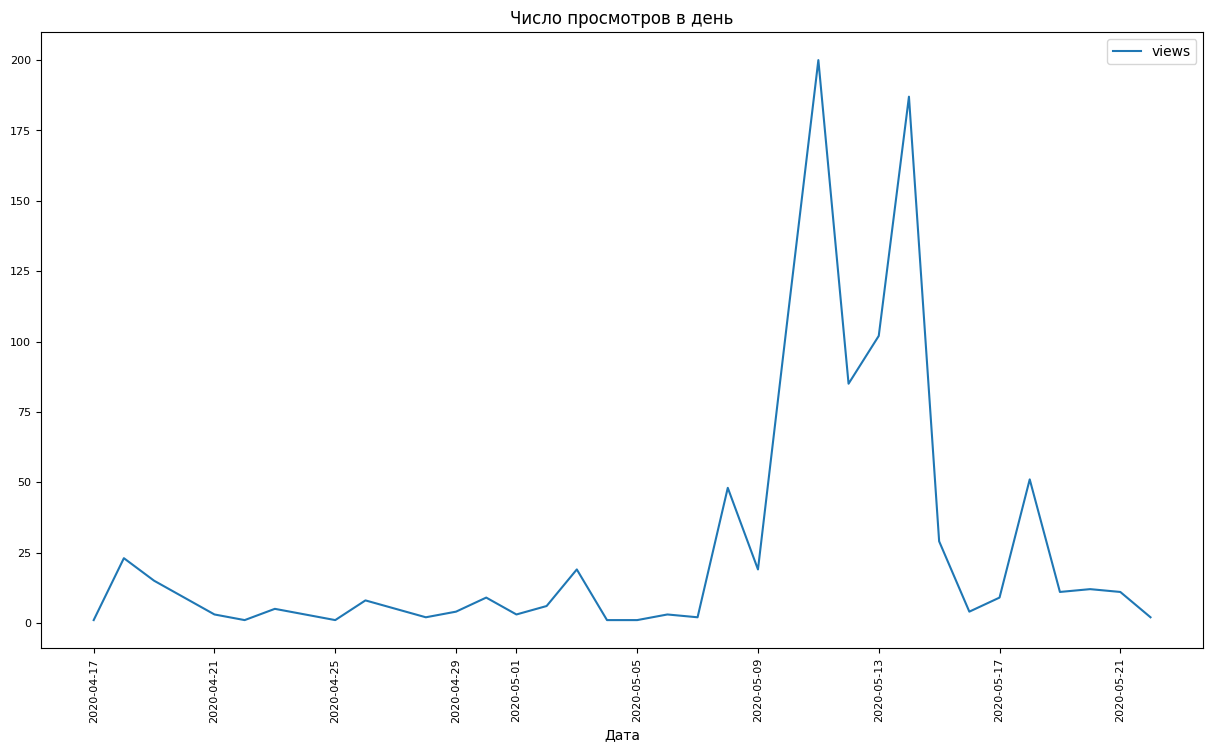

In [16]:
views_number.plot(figsize=(15, 8), rot=90, fontsize=8,
                  title="Число просмотров в день", 
                  xlabel='Дата')
#Используя метод .plot() библиотеки Pandas, создайте график
pass

In [17]:
conn.close()